Updated weights: [ 1.38082946 -1.43654931  2.40449746  0.34513596]
Updated bias: 1.1603194755580206


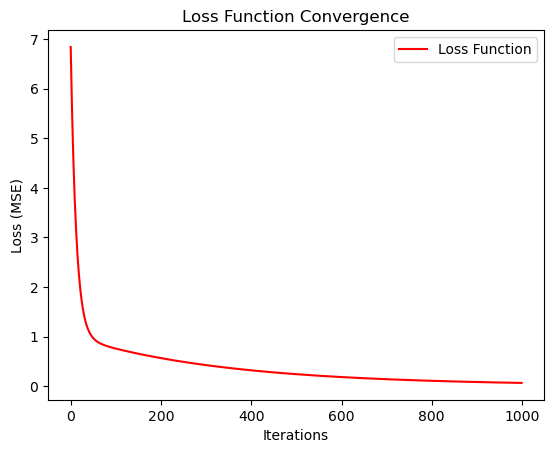

Test Loss (MSE): 0.07140757163366672


In [1]:
'''This code performed linear regression on synthetically generated dataset with 4 features and 100 samples
'''
import numpy as np
import matplotlib.pyplot as plt

# synthetic data (100 samples, 4 features)
np.random.seed(42)
X = np.random.rand(100, 4) 
# True weight and bias
w_true = np.array([1.5, -2.0, 3.0, 0.5])  # Random coefficients for features
b_true = 1.0  # Bias term

# Linear relationship with some noise
y = np.dot(X, w_true) + b_true + np.random.randn(100) * 0.1  # Add some Gaussian noise

# training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial weights and bias
w = np.zeros(X_train.shape[1])  # should match with number of features
b = 0.01  
lr = 0.01  
iterations = 1000  

losses = []  # loss values

def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = np.dot(X, w) + b  # Compute predictions
    error = y_pred - y  # Compute error

    w_grad = (2 / n) * np.dot(X.T, error)  # Compute gradient for weights
    b_grad = (2 / n) * np.sum(error)  # Compute gradient for bias

    return w_grad, b_grad

def compute_loss(X, y, w, b):
    n = len(y)
    y_pred = np.dot(X, w) + b  # Compute predictions
    loss = np.mean((y_pred - y) ** 2)  # Mean Squared Error (MSE)
    return loss

# Gradient Descent Loop, weight and bias update
for i in range(iterations):
    w_grad, b_grad = compute_gradients(X_train, y_train, w, b)
    w -= lr * w_grad  
    b -= lr * b_grad 
    loss = compute_loss(X_train, y_train, w, b)
    losses.append(loss)  

# Final values
print(f"Updated weights: {w}")
print(f"Updated bias: {b}")

# Loss Function Plot
plt.plot(range(iterations), losses, color='red', label="Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Function Convergence")
plt.legend()
plt.show()

# Model Test
y_pred_test = np.dot(X_test, w) + b  # predictions on test data
test_loss = compute_loss(X_test, y_test, w, b)
print(f"Test Loss (MSE): {test_loss}")